**author**: lukethompson@gmail.com<br>
**date**: 26 Feb 2017<br>
**language**: Python 3.5<br>
**conda environment**: emp-py3<br>
**license**: unlicensed<br>
    
## nestedness_nodf_plots.ipynb

* all -- emp_deblur_90bp.subset_2k.rare_5000.biom (this is rarefied, but unrarefied version used to generate below)
* 10_percent -- otu_subset.emp_deblur_90bp.subset_2k.lt_10.0_pc_samp.biom (then rarefied to 5000)
* 5_percent -- otu_subset.emp_deblur_90bp.subset_2k.lt_5.0_pc_samp.biom (then rarefied to 5000)
* 1_percent -- otu_subset.emp_deblur_90bp.subset_2k.lt_1.0_pc_samp.biom (then rarefied to 5000)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from empcolors import get_empo_cat_color
import seaborn as sns
%matplotlib inline

In [2]:
paths_raw = ['~/emp/analyses-nestedness/results-dec29-90bp/all/statisticsgraph.raw.csv',
             '~/emp/analyses-nestedness/results-dec29-90bp/10_percent/statisticsgraph.raw.csv',
             '~/emp/analyses-nestedness/results-dec29-90bp/5_percent/statisticsgraph.raw.csv',
             '~/emp/analyses-nestedness/results-dec29-90bp/1_percent/statisticsgraph.raw.csv']

paths_ses = ['~/emp/analyses-nestedness/results-dec29-90bp/all/statisticsgraph.ses.csv',
             '~/emp/analyses-nestedness/results-dec29-90bp/10_percent/statisticsgraph.ses.csv',
             '~/emp/analyses-nestedness/results-dec29-90bp/5_percent/statisticsgraph.ses.csv',
             '~/emp/analyses-nestedness/results-dec29-90bp/1_percent/statisticsgraph.ses.csv']

path_out = '~/emp/analyses-nestedness/nodf.pdf'

In [9]:
def plot_nodf(path, ylabel, ymin, ymax, title):
    df = pd.read_csv(path)
    plt.plot(df['TAXONOMIC_LEVEL_RANK'], df['EMPO_SUBSET=Animal'], marker='o', color=get_empo_cat_color('Animal'), label='Animal')
    plt.plot(df['TAXONOMIC_LEVEL_RANK'], df['EMPO_SUBSET=Plant'], marker='o', color=get_empo_cat_color('Plant'), label='Plant')
    plt.plot(df['TAXONOMIC_LEVEL_RANK'], df['EMPO_SUBSET=Saline'], marker='o', color=get_empo_cat_color('Saline'), label='Saline')
    plt.plot(df['TAXONOMIC_LEVEL_RANK'], df['EMPO_SUBSET=Nonsaline'], marker='o', color=get_empo_cat_color('Non-saline'), label='Non-saline')
    plt.plot(df['TAXONOMIC_LEVEL_RANK'], df['EMPO_SUBSET=All'], marker='o', color='black', label='All samples')
    #plt.xlabel('Taxonomic level')
    plt.title(title, fontsize=10)
    plt.ylabel(ylabel)
    xticklabels = ['Tag seq.' if x=='otu' else x.capitalize() for x in df['TAXONOMIC_LEVEL']]
    plt.xticks(df['TAXONOMIC_LEVEL_RANK'], xticklabels, rotation=45)
    plt.axis([0.5, 6.5, ymin, ymax])

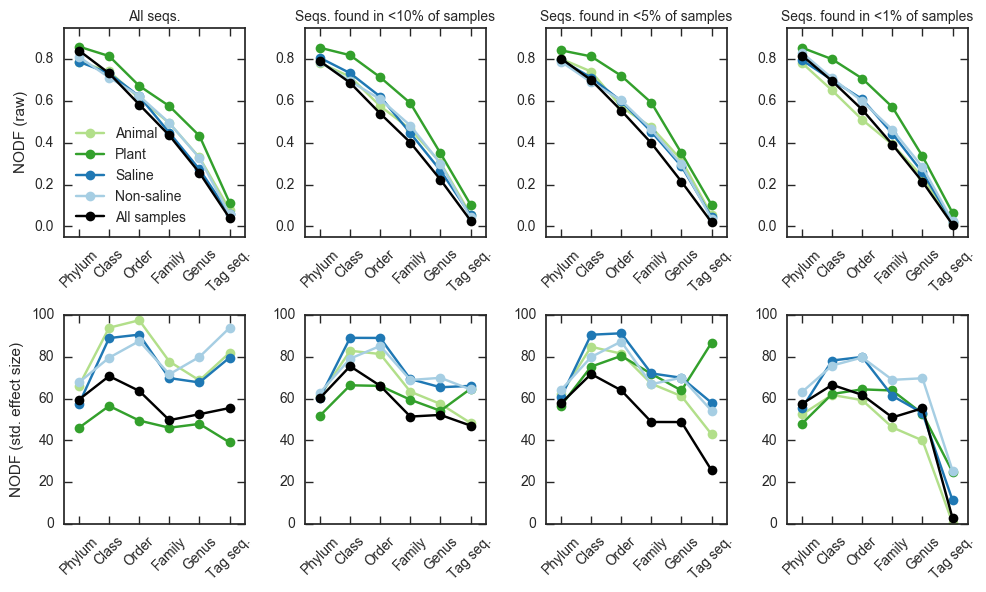

In [16]:
fig = plt.figure(figsize=(10,6))

# NODF raw
plt.subplot(241)
plot_nodf(paths_raw[0], 'NODF (raw)', -0.05, 0.95, 'All seqs.')
plt.legend(loc=3)
plt.subplot(242)
plot_nodf(paths_raw[1], '', -0.05, 0.95, 'Seqs. found in <10% of samples')
plt.subplot(243)
plot_nodf(paths_raw[2], '', -0.05, 0.95, 'Seqs. found in <5% of samples')
plt.subplot(244)
plot_nodf(paths_raw[3], '', -0.05, 0.95, 'Seqs. found in <1% of samples')

# NODF std. effect size
plt.subplot(245)
plot_nodf(paths_ses[0], 'NODF (std. effect size)', 0, 100, '')
plt.subplot(246)
plot_nodf(paths_ses[1], '', 0, 100, '')
plt.subplot(247)
plot_nodf(paths_ses[2], '', 0, 100, '')
plt.subplot(248)
plot_nodf(paths_ses[3], '', 0, 100, '')

plt.tight_layout()
fig.set_size_inches(10, 6)
plt.savefig(path_out)

### Main NODF vs. null

In [11]:
sns.set_style('ticks', {'xtick.direction': u'in', 'ytick.direction': u'in'})

In [12]:
df_nodf = pd.read_excel('~/emp/analyses-nestedness/nodf_obs_null.xlsx')

In [13]:
taxranks=['Phylum','Class','Order','Family','Genus','Tag seq.']

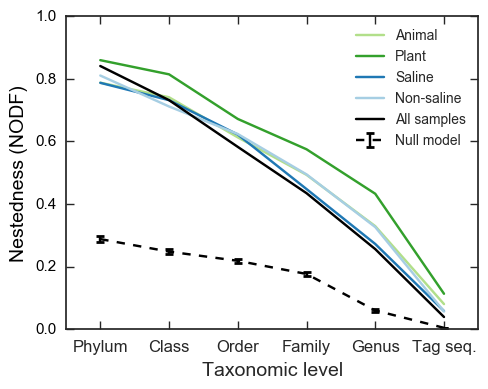

In [14]:
fig, ax2 = plt.subplots(figsize=(5,4))
ax2c = 'k'

df = pd.read_csv(paths_raw[0])
ax2.plot(df['TAXONOMIC_LEVEL_RANK'], df['EMPO_SUBSET=Animal'], marker=None, color=get_empo_cat_color('Animal'), label='Animal')
ax2.plot(df['TAXONOMIC_LEVEL_RANK'], df['EMPO_SUBSET=Plant'], marker=None, color=get_empo_cat_color('Plant'), label='Plant')
ax2.plot(df['TAXONOMIC_LEVEL_RANK'], df['EMPO_SUBSET=Saline'], marker=None, color=get_empo_cat_color('Saline'), label='Saline')
ax2.plot(df['TAXONOMIC_LEVEL_RANK'], df['EMPO_SUBSET=Nonsaline'], marker=None, color=get_empo_cat_color('Non-saline'), label='Non-saline')

ax2.plot([1,2,3,4,5,6], df_nodf.NODF_OBSERVED,
         '-o', color=ax2c, mfc='none', label='All samples')
ax2.errorbar([1,2,3,4,5,6], df_nodf.NODF_NULL_MEAN, df_nodf.NODF_NULL_STDEV,
         fmt='--o', capthick=2, color=ax2c, mfc='none', label='Null model')
ax2.set_ylabel('Nestedness (NODF)', fontsize=14, color=ax2c) # (median +/- std. error)
for label in ax2.get_yticklabels():
    label.set_color(ax2c)
    label.set_size(11)
ax2.legend(loc=1, fontsize=10)

ax2.set_xlabel('Taxonomic level', fontsize=14)
ax2.set_xlim([0.5,6.5])
ax2.set_xticks([1,2,3,4,5,6])
ax2.set_xticklabels(taxranks, size=12)
ax2.set_ylim([0,1])

plt.tight_layout()
fig.savefig("nodfperlevel.pdf", bbox_inches='tight')